<a href="https://colab.research.google.com/github/Pongpang-2102/Text_Mining_and_Sentiment_Analytics_KDAI_projects/blob/main/KDAI_Exercise_TMSA_from_your_data_Text_Summarize_(24_Sep_23).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Sun Sep 24 09:40:18 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
pip install nltk

In [ ]:
pip install python-docx

In [ ]:
pip install transformers sentencepiece

- rouge : เปรียบเทียบการตัดประโยคที่เกิดขึ้นจาก Human และ Machine

In [ ]:
pip install rouge

In [ ]:
pip install pythainlp

In [ ]:
from nltk.cluster.util import cosine_distance
import numpy as np
import networkx as nx
import pandas as pd

import docx
from docx.enum.text import WD_COLOR_INDEX

import rouge

from transformers import AutoTokenizer, AutoModel

from pythainlp.tokenize import word_tokenize

In [ ]:
# ดึง pre-trained model เอามาใช้ในการสร้าง vector ของประโยค
# Load Wangchanberta Model
model_name = "airesearch/wangchanberta-base-att-spm-uncased"
model = AutoModel.from_pretrained(model_name)

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [ ]:
subword = list(tokenizer.vocab.keys())
df = pd.DataFrame(subword, columns =['subword'])
df.shape

(25004, 1)

In [ ]:
df.head(10)

,subword
0,โพลิ
1,แม่เหล็ก
2,วันที่
3,คิตตี้
4,เครื่องมือ
5,ว้า
6,มีอิทธิพล
7,เชล
8,โซเวียต
9,ดํารงชีวิต


In [ ]:
tokenizer.tokenize('สวัสดีครับชาวโลก')

['▁', 'สวัสดีครับ', 'ชาวโลก']

In [ ]:
inputs = tokenizer('สวัสดีครับชาวโลก', return_tensors='pt')

inputs

{'input_ids': tensor([[    5,    10,  5533, 15873,     6]]), 'attention_mask': tensor([[1, 1, 1, 1, 1]])}

In [ ]:
inputs['input_ids']

tensor([[    5,    10,  5533, 15873,     6]])

In [ ]:
tokenizer.decode(inputs['input_ids'][0])

'<s> สวัสดีครับชาวโลก</s>'

In [ ]:
outputs = model(**inputs)

outputs[1].shape

torch.Size([1, 768])

- 768 จะเป็นจำนวนเวกเตอร์ ซึ่งจะนำไปคำนวณหา Sentence Similiarity

In [ ]:
outputs[1]

tensor([[-1.7415e-03, -1.8435e-02,  1.6773e-03,  3.2724e-02, -4.5005e-01,
          3.7407e-01,  2.3650e-01, -4.3904e-01,  5.3071e-01,  1.0394e-01,
          2.5839e-01, -2.1191e-01, -4.9980e-02, -4.0315e-01, -4.9616e-01,
          3.0455e-01, -3.9129e-01, -1.5483e-01,  1.1654e-01, -5.8820e-01,
          8.7397e-02, -9.9180e-03,  5.7237e-03,  2.9143e-02,  3.9419e-01,
          2.0283e-01,  3.5851e-01,  2.3526e-01,  2.4379e-01, -8.6311e-02,
          1.2132e-01, -6.0768e-01,  1.0238e-01, -5.0157e-01,  4.9279e-01,
          3.5147e-02,  2.9007e-01, -9.7012e-02, -1.0634e-01,  2.5652e-01,
         -1.8373e-01,  6.6175e-02, -9.7855e-02, -2.6775e-01, -1.5677e-01,
          1.9742e-01,  3.0807e-01, -3.6781e-01, -1.7246e-01,  2.3263e-01,
          2.7887e-01,  1.8814e-01, -1.7076e-01, -9.1214e-03,  9.2614e-02,
         -1.8832e-02, -1.5682e-02,  1.5432e-01,  2.3732e-02, -1.9179e-01,
         -9.1010e-02, -2.3388e-01, -2.0219e-01, -1.9506e-01,  1.0827e-01,
         -9.5903e-02, -4.1159e-02, -3.

In [ ]:
file_name = 'Original_Onepiece_Wano_textfile.txt'


with open(file_name, 'r') as file:
    corpus = file.read().splitlines()





##try:
#    with open(file_name, 'r', encoding='utf-8') as file:
#        corpus = file.read().splitlines()
#except UnicodeDecodeError:
#    with open(file_name, 'r', encoding='utf-16') as file:
#        corpus = file.read().splitlines()

print(corpus)

['สำรวจ 10 เกร็ดประวัติศาสตร์ญี่ปุ่นจาก One Piece ภาควาโนะคุนิ', 'หลังจากวันพีซ เวอร์ชั่นคนแสดงกลับมา เชื่อว่าหลายคนที่เคยอ่านแล้วหยุดไป ช่วงนี้อาจจะกลับมาเริ่มอ่านกันใหม่ แถมตอนปัจจุบันของวันพีซอย่างภาควาโนะ หรือวาโนะคุนิ (Wano Kuni) ก็นับเป็นภาคที่เรียกได้ว่า ดุเดือด เพราะลูฟี่เองก็อยู่ในช่วงเฉิดฉาย ปลดล็อกพลัง และเริ่มพุ่งชนกับศัตรูระดับสูงๆ ซึ่งเราจะไม่ขอสปอยล์ในตอนนี้', 'นอกจากความดุเดือดและความเข้มข้นในภาควาโนะ จากการเดินทางของลูฟี่ที่ไปไกลขึ้นเรื่อยๆ หรือการเริ่มเผยความลับบางอย่างที่ผูกไว้ยาวนานเป็นสิบๆ ปี ให้ค่อยๆ คลี่คลายลง ภาควาโนะจึงน่าจะนับได้ว่าเป็นอีกภาคที่พิเศษ เพราะอาจารย์โอดะ เออิจิโร\xa0(Oda Eiichirō)\xa0เลือกเล่าแบบมีอาณาจักรญี่ปุ่น พอดูๆ ไป ถ้าคนที่สนใจประวัติศาสตร์หรือวัฒนธรรมญี่ปุ่น ก็จะรู้สึกได้ถึงร่องรอยการอ้างอิงประวัติศาสตร์ และความเป็นวัฒนธรรมที่ค่อนข้างลึกซึ้ง ซึ่งอาจารย์โอดะก็ไม่ได้นำมาแค่กลิ่นอาย แต่อาจนำแกนความคิดบางอย่างของบริบทญี่ปุ่นมากางไว้เป็นแกนของภาคนี้ ', 'จุดหนึ่งที่น่าสนใจมาก คือการแบ่งภาควาโนะออกเป็น 3 องก์ และในการแบ่งภาคนี้ก็มีข้อสังเกตว่า อา

In [ ]:
sentences = [s.strip() for s in corpus]

In [ ]:
sentence_size = len(sentences)
sentence_size

35

In [ ]:
sentences_tokens = [tokenizer(s, return_tensors="pt") for s in sentences]

In [ ]:
sentences_encode = [model(**token) for token in sentences_tokens]

len(sentences_encode)

35

In [ ]:
sentences_encode[0][1].shape

torch.Size([1, 768])

In [ ]:
sentences_vec = [np.squeeze(vec[1].detach().numpy()) for vec in sentences_encode]

sentences_vec[0].shape

(768,)

In [ ]:
def build_similarity_matrix(sentences):
    similarity_matrix = np.zeros((len(sentences), len(sentences)))

    for idx1 in range(len(sentences)):
        for idx2 in range(len(sentences)):
            if idx1 == idx2: #ignore if both are same sentences
                continue
            similarity_matrix[idx1][idx2] = sentence_similarity(sentences[idx1], sentences[idx2])

    return similarity_matrix

In [ ]:
def sentence_similarity(sent1, sent2):
    return 1 - cosine_distance(sent1, sent2)

In [ ]:
sentence_similarity_martix = build_similarity_matrix(sentences_vec)

sentence_similarity_martix.shape

(35, 35)

In [ ]:
sentence_similarity_martix

array([[0.        , 0.68715722, 0.66519603, ..., 0.61956294, 0.61804076,
        0.67670773],
       [0.68715722, 0.        , 0.78494316, ..., 0.35820023, 0.72161264,
        0.67162971],
       [0.66519603, 0.78494316, 0.        , ..., 0.35227467, 0.75778861,
        0.82427809],
       ...,
       [0.61956294, 0.35820023, 0.35227467, ..., 0.        , 0.43562468,
        0.47195529],
       [0.61804076, 0.72161264, 0.75778861, ..., 0.43562468, 0.        ,
        0.76607944],
       [0.67670773, 0.67162971, 0.82427809, ..., 0.47195529, 0.76607944,
        0.        ]])

In [ ]:
G = nx.Graph()
G.add_edge('A', 'B', weight=4)
G.add_edge('B', 'D', weight=2)
G.add_edge('A', 'C', weight=3)
G.add_edge('C', 'D', weight=4)

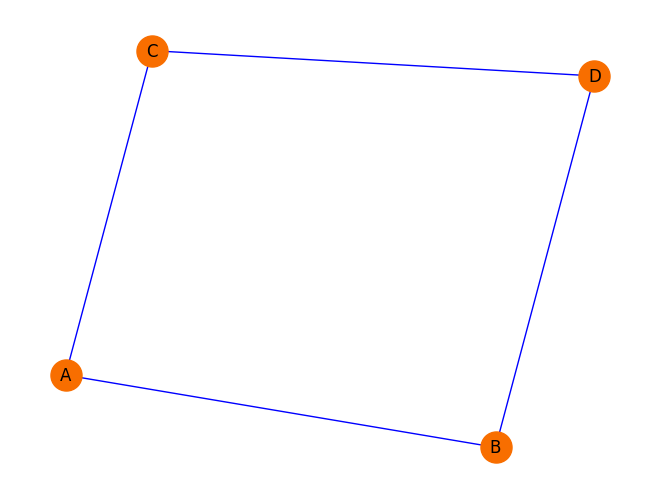

In [ ]:
pos = nx.spring_layout(G, seed=4321)
nx.draw(G,
        pos=pos,
        node_size=500,
        node_color='#f86e00',
        edge_color='blue',
        with_labels=True)

In [ ]:
nx.shortest_path(G, 'A', 'D', weight='weight')

['A', 'B', 'D']

In [ ]:
matrixA = np.array([[0., 1., 1.],
                    [0., 0., 0.],
                    [0., 0., 0.]])

g1 = nx.from_numpy_array(matrixA)

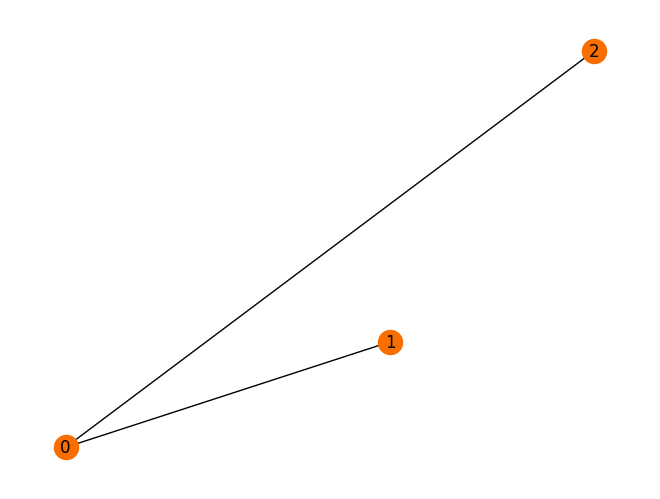

In [ ]:
pos = nx.spiral_layout(g1)

nx.draw(g1,
        pos=pos,
        with_labels = True,
        node_color="#f86e00")

In [ ]:
nx.to_numpy_array(g1)

array([[0., 1., 1.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [ ]:
sentence_similarity_graph = nx.from_numpy_array(sentence_similarity_martix)

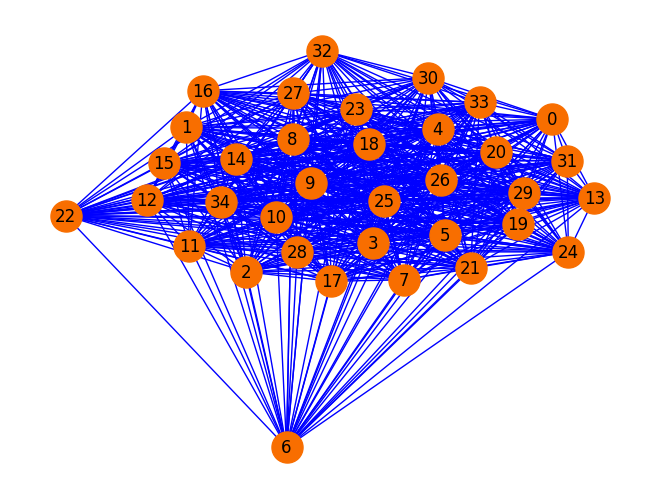

In [ ]:
pos = nx.spring_layout(sentence_similarity_graph, seed=999)

nx.draw(sentence_similarity_graph,
        pos=pos, node_size=500,
        node_color='#f86e00',
        edge_color='blue',
        with_labels=True,
        width=1)

- ดึงค่า wt ออกมาดูได้ตามด้านล่าง

In [ ]:
nx.get_edge_attributes(sentence_similarity_graph,'weight')

{(0, 1): 0.687157222180951,
 (0, 2): 0.6651960331400539,
 (0, 3): 0.6608466151210486,
 (0, 4): 0.7787142707333667,
 (0, 5): 0.859256006884274,
 (0, 6): 0.06511522540923187,
 (0, 7): 0.6764609526795671,
 (0, 8): 0.6882735944655793,
 (0, 9): 0.5858762754817262,
 (0, 10): 0.7604935933665616,
 (0, 11): 0.6062613222324688,
 (0, 12): 0.567095590595829,
 (0, 13): 0.733770238597406,
 (0, 14): 0.6757566141300342,
 (0, 15): 0.625573397180708,
 (0, 16): 0.6799743013713998,
 (0, 17): 0.7655558345353235,
 (0, 18): 0.6122063805976604,
 (0, 19): 0.7381975999763309,
 (0, 20): 0.6976073101535312,
 (0, 21): 0.6752471505353767,
 (0, 22): 0.5024339525635826,
 (0, 23): 0.6214619111385009,
 (0, 24): 0.5978011863991006,
 (0, 25): 0.708916168557919,
 (0, 26): 0.7089178624663178,
 (0, 27): 0.7467991096200692,
 (0, 28): 0.597048887793078,
 (0, 29): 0.6670474196261553,
 (0, 30): 0.7627381032260886,
 (0, 31): 0.6508775522506344,
 (0, 32): 0.6195629417794589,
 (0, 33): 0.6180407550215257,
 (0, 34): 0.6767077274109

In [ ]:
G = nx.DiGraph()

[G.add_node(k) for k in ['A', 'B', 'C', 'D', 'E', 'F', 'G']]

G.add_edges_from([('G','A'), ('A','G'),('B','A'),
                  ('C','A'),('A','C'),('A','D'),
                  ('E','A'),('F','A'),('D','B'),
                  ('D','F')])

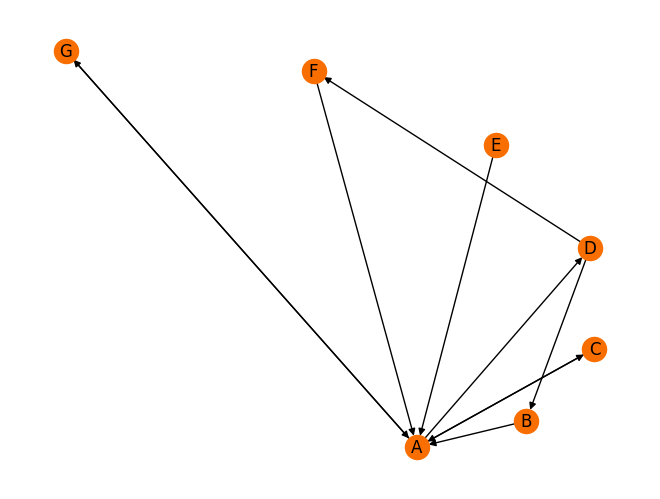

In [ ]:
pos = nx.spiral_layout(G)
nx.draw(G,
        pos=pos,
        with_labels = True,
        node_color="#f86e00")

In [ ]:
pr1 = nx.pagerank(G)

pr1

{'A': 0.4080745143467559,
 'B': 0.07967426232810562,
 'C': 0.13704946318948705,
 'D': 0.13704946318948705,
 'E': 0.021428571428571432,
 'F': 0.07967426232810562,
 'G': 0.13704946318948705}

- ปรับขนาด node ตามค่า PageRank

In [ ]:
PR = [str(round(v * 100, 2)) + '%' for v in pr1.values()]

PR

['40.81%', '7.97%', '13.7%', '13.7%', '2.14%', '7.97%', '13.7%']

In [ ]:
name = [k for k in G._node.keys()]

name

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [ ]:
dict(zip(name, PR))

{'A': '40.81%',
 'B': '7.97%',
 'C': '13.7%',
 'D': '13.7%',
 'E': '2.14%',
 'F': '7.97%',
 'G': '13.7%'}

In [ ]:
size = [v * 6000 for v in pr1.values()]

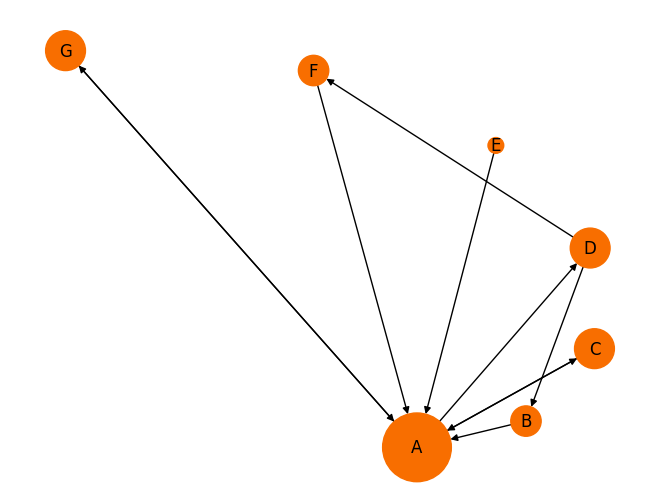

In [ ]:
pos = nx.spiral_layout(G)
nx.draw(G,
        pos=pos,
        with_labels = True,
        node_color="#f86e00",
        node_size=size)

In [ ]:
nx.to_numpy_array(G)

array([[0., 0., 1., 1., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.]])

In [ ]:
G = nx.DiGraph()
G.add_edge('B', 'A')
G.add_edge('C', 'A')
G.add_edge('D', 'A')
G.add_edge('B', 'C')
G.add_edge('D', 'B')
G.add_edge('D', 'C')

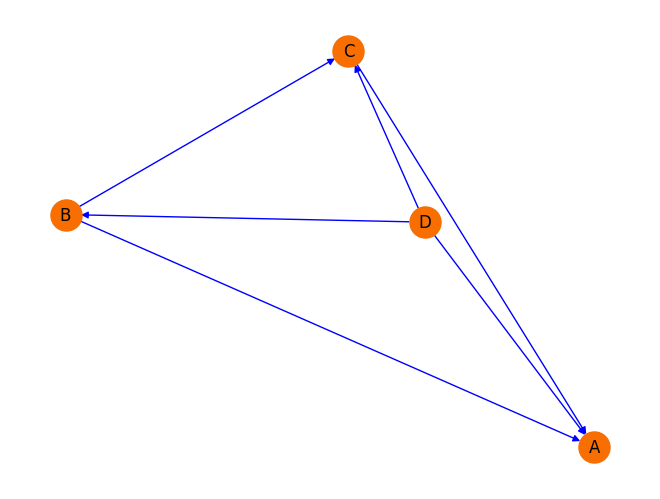

In [ ]:
pos = nx.spring_layout(G, seed=4321)
nx.draw(G,
        pos=pos,
        node_size=500,
        node_color='#f86e00',
        edge_color='blue',
        with_labels=True)

In [ ]:
"""PR(A) = 0.25 PR(B) = 0.25 PR(C) = 0.25 PR(D) = 0.25

สำหรับทุก Web Page q ที่ Connect มายัง Web Page A
PR(A) = (1-d) + d*(PR(B)/On(B) + PR(C)/On(C) + PR(D)/On(D))

โดย d หรือ damping factor = 0.85 และ
On(q) เท่ากับจำนวน Link ขาออก (Outgoing Links) ของ Page q

ดังนั้น PR(A) = 0.15 + 0.85(0.25/2 + 0.25/1 + 0.25/3) = 0.5395833333 """

'PR(A) = 0.25 PR(B) = 0.25 PR(C) = 0.25 PR(D) = 0.25\n\nสำหรับทุก Web Page q ที่ Connect มายัง Web Page A\nPR(A) = (1-d) + d*(PR(B)/On(B) + PR(C)/On(C) + PR(D)/On(D))\n\nโดย d หรือ damping factor = 0.85 และ\nOn(q) เท่ากับจำนวน Link ขาออก (Outgoing Links) ของ Page q\n\nดังนั้น PR(A) = 0.15 + 0.85(0.25/2 + 0.25/1 + 0.25/3) = 0.5395833333 '

In [ ]:
PR = nx.pagerank(G)

PR

{'B': 0.17121913703515862,
 'A': 0.4513761585479028,
 'C': 0.24398745873843833,
 'D': 0.13341724567850016}

In [ ]:
nx.to_numpy_array(G)

array([[0., 1., 1., 0.],
       [0., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 1., 1., 0.]])

In [ ]:
nx.to_numpy_array(G)

array([[0., 1., 1., 0.],
       [0., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 1., 1., 0.]])

In [ ]:
D=nx.DiGraph()

D.add_edge('A', 'B')
D.add_edge('A', 'C')

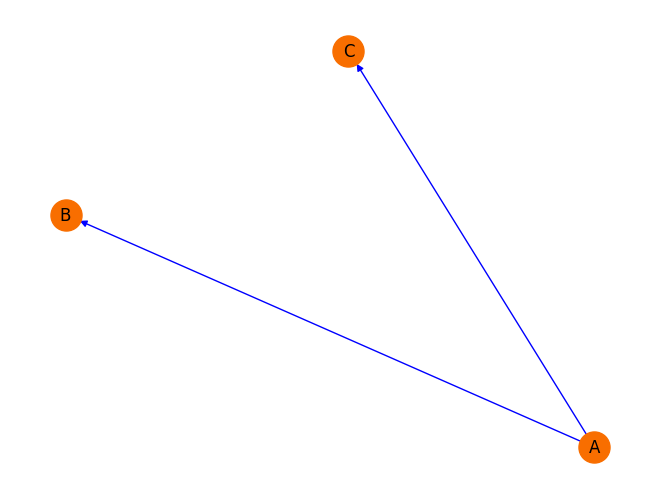

In [ ]:
nx.draw(D,
        pos=pos,
        node_size=500,
        node_color='#f86e00',
        edge_color='blue',
        with_labels=True)

In [ ]:
nx.to_numpy_array(D)

array([[0., 1., 1.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [ ]:
nx.pagerank(D)

{'A': 0.25974050510584634, 'B': 0.37012974744707666, 'C': 0.37012974744707666}

In [ ]:
D.add_weighted_edges_from([('A','B',0.5),('A','C',0.5)])

nx.to_numpy_array(D)

array([[0. , 0.5, 0.5],
       [0. , 0. , 0. ],
       [0. , 0. , 0. ]])

In [ ]:
nx.pagerank(D)

{'A': 0.25974050510584634, 'B': 0.37012974744707666, 'C': 0.37012974744707666}

In [ ]:
D['A']['C']['weight']=1

nx.to_numpy_array(D)

array([[0. , 0.5, 1. ],
       [0. , 0. , 0. ],
       [0. , 0. , 0. ]])

In [ ]:
nx.pagerank(D)

{'A': 0.25974050510584634, 'B': 0.3333333333333332, 'C': 0.40692616156082007}

In [ ]:
pos = nx.spring_layout(sentence_similarity_graph, seed=999)

scores = nx.pagerank(sentence_similarity_graph)

scores

{0: 0.028882288558403295,
 1: 0.028507959813557842,
 2: 0.030157090271051384,
 3: 0.030226641920671912,
 4: 0.03236170949476025,
 5: 0.030425201309215437,
 6: 0.00744952087586606,
 7: 0.030690162113688878,
 8: 0.0309871893522707,
 9: 0.02954328814339565,
 10: 0.027853574457336043,
 11: 0.030011290721788573,
 12: 0.028628834855249453,
 13: 0.02853681822503993,
 14: 0.031120691891927357,
 15: 0.030278158525040472,
 16: 0.02484747661158592,
 17: 0.0316955128941199,
 18: 0.02817433153064724,
 19: 0.028935042421696446,
 20: 0.031221463368547777,
 21: 0.030909931828721485,
 22: 0.01931532241280168,
 23: 0.031009545231700287,
 24: 0.02501898544359425,
 25: 0.031170165875766334,
 26: 0.03140144543084412,
 27: 0.02867619770181075,
 28: 0.030827707695228915,
 29: 0.03090729660194308,
 30: 0.027221464434426548,
 31: 0.030030734649993115,
 32: 0.02166578006571854,
 33: 0.029996009637501528,
 34: 0.03131516563408875}

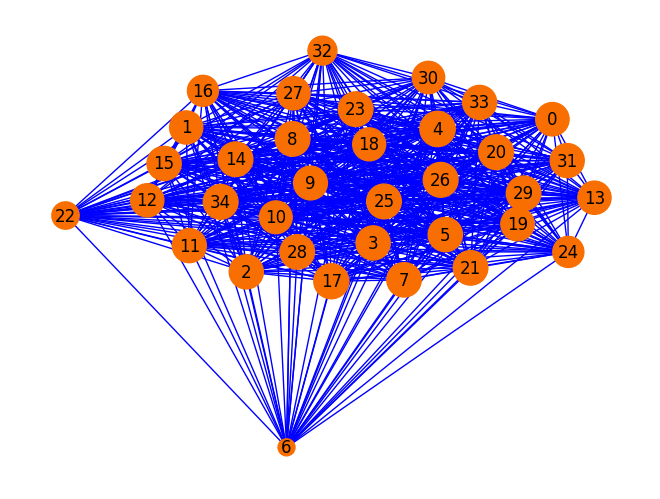

In [ ]:
size = [v * 20000 for v in scores.values()]

nx.draw(sentence_similarity_graph,
        pos=pos,
        node_color='#f86e00',
        edge_color='blue',
        with_labels=True,
        width=1,
        node_size=size)

In [ ]:
ranked_sentence = sorted(((scores[i],s) for i, s in enumerate(sentences)), reverse=True)

ranked_sentence

[(0.03236170949476025,
  'ดังนั้นในความคุ้นๆ นี้ The MATTER จึงชวนอ่านเกร็ดหรือการอ้างอิงประวัติศาสตร์ และตำนานปรัมปราของญี่ปุ่นบางส่วน ที่เราอาจจะพบได้ในภาควาโนะ เป็นเกร็ดที่ทำให้เราทั้งสนุกกับเนื้อเรื่อง หรือไปค้นคว้าอ่านต่อได้ จากระบบโชกุนที่รวมชาติ โดยโอดะ โนบูนางะ (Oda Nobunaga)\xa0แค่ชื่อก็คล้ายกับโอเด้ง แถมยังเป็นคนห่ามๆ ไม่ต่างกัน ทั้งนโยบายโดดเดี่ยวประเทศ ละครโนห์ที่แบ่งออกเป็น 3 องก์ รวมถึงการเล่าเรื่องราวของนักรบผู้ถูกทรมาน และการต่อสู้กับปีศาจร้ายและมังกร ทำความรู้จักนครบุปผา ไปจนถึงจุดเล็กๆ เช่น การเล่าถึงนาฬิกา ที่แม้จะโผล่มานิดหน่อย แต่ก็มีนัยสำคัญจากการรับเทคโนโลยีของญี่ปุ่นด้วย'),
 (0.0316955128941199,
  '"ในบางช่วงเราจะรู้สึกว่าภาควาโนะนั้นยาวมาก แต่จุดที่น่าสนใจคือ ภาคนี้แบ่งองก์ หรือ Act ออกเป็น 3 ช่วง (เท่าที่เปิดเผยมา) คาดกันว่าน่าจะล้อมาจากวิธีการแบ่งองก์ของละครโนห์ (Noh Theater) รวมถึงละครคาบูกิ (Kabuki) ด้วยที่จะแบ่งช่วงออกเป็น 3 องก์ คือเป็นจังหวะของการแสดงที่ประกอบด้วย 3 ลำดับอย่าง Jo-ha-kyū (Beginning, Break, Rapid) ที่เป็นเหมือนหลักทางสุนทรียศาสตร์ของศิลปะด

In [ ]:
ranked_sentence[0][0]

0.03236170949476025

In [ ]:
ranked_sentence[0][1]

'ดังนั้นในความคุ้นๆ นี้ The MATTER จึงชวนอ่านเกร็ดหรือการอ้างอิงประวัติศาสตร์ และตำนานปรัมปราของญี่ปุ่นบางส่วน ที่เราอาจจะพบได้ในภาควาโนะ เป็นเกร็ดที่ทำให้เราทั้งสนุกกับเนื้อเรื่อง หรือไปค้นคว้าอ่านต่อได้ จากระบบโชกุนที่รวมชาติ โดยโอดะ โนบูนางะ (Oda Nobunaga)\xa0แค่ชื่อก็คล้ายกับโอเด้ง แถมยังเป็นคนห่ามๆ ไม่ต่างกัน ทั้งนโยบายโดดเดี่ยวประเทศ ละครโนห์ที่แบ่งออกเป็น 3 องก์ รวมถึงการเล่าเรื่องราวของนักรบผู้ถูกทรมาน และการต่อสู้กับปีศาจร้ายและมังกร ทำความรู้จักนครบุปผา ไปจนถึงจุดเล็กๆ เช่น การเล่าถึงนาฬิกา ที่แม้จะโผล่มานิดหน่อย แต่ก็มีนัยสำคัญจากการรับเทคโนโลยีของญี่ปุ่นด้วย'

In [ ]:
top_n = round(sentence_size*0.2)

top_n

7

In [ ]:
sum_text = ''
for i in range(top_n):
  sum_text = sum_text + '\n' + ranked_sentence[i][1]

In [ ]:
sum_list = []
for i in range(top_n):
  sum_list.append(ranked_sentence[i][1])

In [ ]:
original_text = ''
for st in sentences:
  original_text = original_text + '\n' + st

In [ ]:
print('\nSummarize Text: \n', sum_text)


Summarize Text: 
 
ดังนั้นในความคุ้นๆ นี้ The MATTER จึงชวนอ่านเกร็ดหรือการอ้างอิงประวัติศาสตร์ และตำนานปรัมปราของญี่ปุ่นบางส่วน ที่เราอาจจะพบได้ในภาควาโนะ เป็นเกร็ดที่ทำให้เราทั้งสนุกกับเนื้อเรื่อง หรือไปค้นคว้าอ่านต่อได้ จากระบบโชกุนที่รวมชาติ โดยโอดะ โนบูนางะ (Oda Nobunaga) แค่ชื่อก็คล้ายกับโอเด้ง แถมยังเป็นคนห่ามๆ ไม่ต่างกัน ทั้งนโยบายโดดเดี่ยวประเทศ ละครโนห์ที่แบ่งออกเป็น 3 องก์ รวมถึงการเล่าเรื่องราวของนักรบผู้ถูกทรมาน และการต่อสู้กับปีศาจร้ายและมังกร ทำความรู้จักนครบุปผา ไปจนถึงจุดเล็กๆ เช่น การเล่าถึงนาฬิกา ที่แม้จะโผล่มานิดหน่อย แต่ก็มีนัยสำคัญจากการรับเทคโนโลยีของญี่ปุ่นด้วย
"ในบางช่วงเราจะรู้สึกว่าภาควาโนะนั้นยาวมาก แต่จุดที่น่าสนใจคือ ภาคนี้แบ่งองก์ หรือ Act ออกเป็น 3 ช่วง (เท่าที่เปิดเผยมา) คาดกันว่าน่าจะล้อมาจากวิธีการแบ่งองก์ของละครโนห์ (Noh Theater) รวมถึงละครคาบูกิ (Kabuki) ด้วยที่จะแบ่งช่วงออกเป็น 3 องก์ คือเป็นจังหวะของการแสดงที่ประกอบด้วย 3 ลำดับอย่าง Jo-ha-kyū (Beginning, Break, Rapid) ที่เป็นเหมือนหลักทางสุนทรียศาสตร์ของศิลปะดั้งเดิมญี่ปุ่นในหลายๆ แขนง"
สำหรับนคร

In [ ]:
print('\nOriginal Text: \n', original_text)


Original Text: 
 
สำรวจ 10 เกร็ดประวัติศาสตร์ญี่ปุ่นจาก One Piece ภาควาโนะคุนิ
หลังจากวันพีซ เวอร์ชั่นคนแสดงกลับมา เชื่อว่าหลายคนที่เคยอ่านแล้วหยุดไป ช่วงนี้อาจจะกลับมาเริ่มอ่านกันใหม่ แถมตอนปัจจุบันของวันพีซอย่างภาควาโนะ หรือวาโนะคุนิ (Wano Kuni) ก็นับเป็นภาคที่เรียกได้ว่า ดุเดือด เพราะลูฟี่เองก็อยู่ในช่วงเฉิดฉาย ปลดล็อกพลัง และเริ่มพุ่งชนกับศัตรูระดับสูงๆ ซึ่งเราจะไม่ขอสปอยล์ในตอนนี้
นอกจากความดุเดือดและความเข้มข้นในภาควาโนะ จากการเดินทางของลูฟี่ที่ไปไกลขึ้นเรื่อยๆ หรือการเริ่มเผยความลับบางอย่างที่ผูกไว้ยาวนานเป็นสิบๆ ปี ให้ค่อยๆ คลี่คลายลง ภาควาโนะจึงน่าจะนับได้ว่าเป็นอีกภาคที่พิเศษ เพราะอาจารย์โอดะ เออิจิโร (Oda Eiichirō) เลือกเล่าแบบมีอาณาจักรญี่ปุ่น พอดูๆ ไป ถ้าคนที่สนใจประวัติศาสตร์หรือวัฒนธรรมญี่ปุ่น ก็จะรู้สึกได้ถึงร่องรอยการอ้างอิงประวัติศาสตร์ และความเป็นวัฒนธรรมที่ค่อนข้างลึกซึ้ง ซึ่งอาจารย์โอดะก็ไม่ได้นำมาแค่กลิ่นอาย แต่อาจนำแกนความคิดบางอย่างของบริบทญี่ปุ่นมากางไว้เป็นแกนของภาคนี้
จุดหนึ่งที่น่าสนใจมาก คือการแบ่งภาควาโนะออกเป็น 3 องก์ และในการแบ่งภาคนี้ก็มีข้อสังเกตว่า อ

In [ ]:
doc = docx.Document()

doc.add_heading('Summarize Text', 0)

para = doc.add_paragraph('''\n''')

for st in sentences:
  if st.strip() in sum_list:
    para.add_run(st+'\n').font.highlight_color = WD_COLOR_INDEX.YELLOW
  else:
    para.add_run(st+'\n')

doc.save('summarize_onePiece_Wano.docx')

In [ ]:
def evaluate_summary(y_test, predicted):
   rouge_score = rouge.Rouge()
   scores = rouge_score.get_scores(y_test, predicted, avg=True)
   score_1 = round(scores['rouge-1']['f'], 2)
   score_2 = round(scores['rouge-2']['f'], 2)
   score_L = round(scores['rouge-l']['f'], 2)
   print('Rouge1:', score_1)
   print('Rouge2:', score_2)
   print('RougeL:', score_L)
   print('Avg Rouge:', round(np.mean([score_1, score_2, score_L]), 2))

In [ ]:
filename = 'Human_Selected_OnePiece_wano_textfile_new.txt'

with open(file_name, 'r') as file:
    human_summarie = file.read().splitlines()

human_summarie = [s.strip() for s in human_summarie]

len(human_summarie)

35

In [ ]:
def tokenizer(st_list):
  words = []

  for s in st_list:
      w = word_tokenize(s)
      w = [temp for temp in w if temp != ' ']

      if w != []:
        words.append(' '.join(w).lower())

  return words

In [ ]:
human_summarie_word = tokenizer(human_summarie)
sum_list_word = tokenizer(sum_list)

test = ' '.join(human_summarie_word)
predicted = ' '.join(sum_list_word)

In [ ]:
test

'สำรวจ 10 เกร็ด ประวัติศาสตร์ ญี่ปุ่น จาก one piece ภาค วา โนะ คุ นิ หลังจาก วัน พี ซ เวอร์ชั่น คน แสดง กลับมา เชื่อ ว่า หลาย คน ที่ เคย อ่าน แล้ว หยุด ไป ช่วงนี้ อาจจะ กลับมา เริ่ม อ่าน กัน ใหม่ แถม ตอน ปัจจุบัน ของ วัน พี ซอ ย่าง ภาค วา โนะ หรือ วา โนะ คุ นิ ( wano kuni ) ก็ นับ เป็น ภาค ที่ เรียก ได้ ว่า ดุเดือด เพราะ ลู ฟี่ เอง ก็ อยู่ ใน ช่วง เฉิดฉาย ปลดล็อก พลัง และ เริ่ม พุ่งชน กับ ศัตรู ระดับสูง ๆ ซึ่ง เรา จะ ไม่ ขอ สปอยล์ ใน ตอนนี้ นอกจาก ความ ดุเดือด และ ความ เข้มข้น ใน ภาค วา โนะ จาก การ เดินทาง ของ ลู ฟี่ ที่ ไป ไกล ขึ้น เรื่อยๆ หรือ การ เริ่ม เผยความลับ บางอย่าง ที่ ผูก ไว้ ยาวนาน เป็นสิบๆ ปี ให้ ค่อยๆ คลี่คลาย ลง ภาค วา โนะ จึง น่าจะ นับ ได้ ว่า เป็น อีก ภาค ที่ พิเศษ เพราะ อาจารย์ โอ ดะ เอ อิ จิ โร \xa0( oda eiichir ō)\xa0 เลือก เล่า แบบ มี อาณาจักร ญี่ปุ่น พอ ดูๆ ไป ถ้า คน ที่ สนใจ ประวัติศาสตร์ หรือ วัฒนธรรม ญี่ปุ่น ก็ จะ รู้สึก ได้ ถึง ร่องรอย การ อ้าง อิงประวัติศาสตร์ และ ความ เป็น วัฒนธรรม ที่ ค่อนข้าง ลึกซึ้ง ซึ่ง อาจารย์ โอ ดะ ก็ ไม่ ได้ นำมา แค่ กลิ่นอาย แต่ อาจ 

In [ ]:
predicted

'ดังนั้น ใน ความ คุ้นๆ นี้ the matter จึง ชวน อ่าน เกร็ด หรือ การ อ้าง อิงประวัติศาสตร์ และ ตำนาน ปรัมปรา ของ ญี่ปุ่น บางส่วน ที่ เรา อาจจะ พบ ได้ ใน ภาค วา โนะ เป็น เกร็ด ที่ ทำให้ เรา ทั้ง สนุก กับ เนื้อเรื่อง หรือ ไป ค้นคว้า อ่าน ต่อ ได้ จาก ระบบ โชกุน ที่รวม ชาติ โดย โอ ดะ โน บู นา งะ ( oda nobunaga )\xa0 แค่ ชื่อ ก็ คล้าย กับ โอ เด้ง แถม ยัง เป็น คน ห่าม ๆ ไม่ ต่างกัน ทั้ง นโยบาย โดดเดี่ยว ประเทศ ละคร โน ห์ ที่ แบ่ง ออก เป็น 3 องก์ รวมถึง การ เล่า เรื่องราว ของ นักรบ ผู้ ถูก ทรมาน และ การต่อสู้ กับ ปีศาจร้าย และ มังกร ทำความรู้จัก นคร บุปผา ไป จนถึง จุด เล็ก ๆ เช่น การ เล่า ถึง นาฬิกา ที่ แม้ จะ โผล่ มา นิดหน่อย แต่ ก็ มี นัยสำคัญ จาก การ รับ เทคโนโลยี ของ ญี่ปุ่น ด้วย " ใน บาง ช่วง เรา จะ รู้สึก ว่า ภาค วา โนะ นั้น ยาว มาก แต่ จุด ที่ น่าสนใจ คือ ภาค นี้ แบ่ง องก์ หรือ act ออก เป็น 3 ช่วง ( เท่าที่ เปิดเผย มา ) คาด กัน ว่า น่าจะ ล้อ มาจาก วิธีการ แบ่ง องก์ ของ ละคร โน ห์ ( noh theater ) รวมถึง ละคร คา บูกิ ( kabuki ) ด้วย ที่จะ แบ่ง ช่วง ออก เป็น 3 องก์ คือ เป็นจังหวะ ของ การแสดง

In [ ]:
import sys
sys.setrecursionlimit(3000)

In [ ]:
evaluate_summary(test, predicted)

Rouge1: 0.64
Rouge2: 0.51
RougeL: 0.42
Avg Rouge: 0.52
